Two options to follow along today:  

Download the codebase from https://github.com/smeylan/ggplot2_tutorial

Then:
- If you have a notebook with an R kernel, put the .ipynb notebook somewhere you can run it  
- If you are using RStudio, the standard R application, or the command line, you can look at the compiled notebook on Github and execute the corresponding code in `ggplot2tutorial.R`  


In [1]:
library(ggplot2)
#if this fails, try install.packages("ggplot2")
# also make sure you have colorRamps, reshape, and grid

#create the directories that we will save figures into later
dir.create('results', showWarnings=F)
dir.create('figures', showWarnings=F)

# Goals
- create publication-quality figures
- quickly generate figures for data analysis
- concretely: generate the following figure:

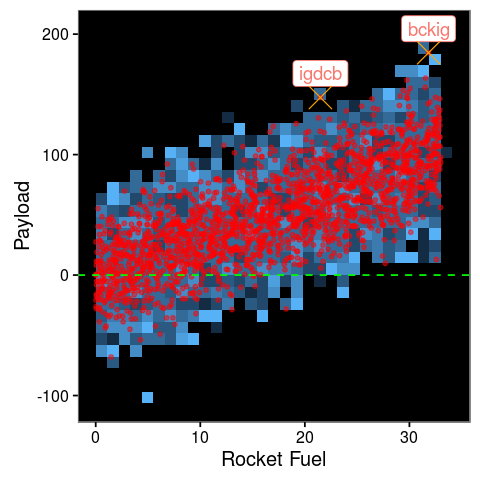

In [2]:
options(repr.plot.width = 4, repr.plot.height = 4)
source('testPlot2.R')

# Outline of the Workshop
1) Theory and Background  
2) Hello World  
3) Primitives  
4) Additional Examples  
5) Housekeeping  
6) Resources  
7) Exercise  

# Theory and Background

<img src="images/grammar_of_graphics.jpg" alt="Drawing" style="width: 300px; float: right"/>
- `ggplot` is an implementation of *The Grammar of Graphics,* a set of specifications for visualizations by Leland Wilkinson

- As explained by Hadley Wickham, the author of `ggplot`:
    - A <font color="lightblue">plot</font> is made of multiple layers
    - A <font color="lightblue">layer</font> consists of <font color="lightblue">data</font>, a set of <font color="lightblue">mappings</font> between variables and aesthetics, a <font color="lightblue">geom</font>etic object, and a <font color="lightblue">stat</font>istical transformation
    - <font color="lightblue">Scales</font> control the details of the mapping
    - All components are independent and reusable


From 'GGplot2: A backstage tour', Hadley Wickham, February 2012

- In order to implement the Grammar of Graphics, `ggplot` uses the + operator to add layers or specifications to a plot. In effect, you `add` additional information to a plot. 
<br /><br />

<center>
`ggplot(df) + geom_points(aes(x,y))`
</center>
- `ggplot` is part of the "Hadleyverse," one of the many (extremely popular) packages by Hadley Wickham, including `reshape`, `plyr`, `stringr`, `dplyr`, `gtable`,  and `tidyr`: if you don't know about these, go take a look!  

https://priceonomics.com/hadley-wickham-the-man-who-revolutionized-r/

- Hadley is from New Zealand; many functions use British spellings!

<table>
<tr>
<td>
<img src="images/hadley.jpg" style="height: 300px;"/>
</td>
<td>
<img src="images/hadleyverse.png" style="height: 300px;"/>
</td>
</tr>
</table>

### <i>How does ggplot compare to other graphing libraries?</i>  
R: 
- built-in: (plot): very verbose for complicated plots
- `lattice`: very terse, but ugly. Adds faceting, data summarization, auto-colorization, per-panel plotting functions  

Python:
- `matplotlib`: equivalent to `ggplot`
- `seaborn`: high-level interface to `matplotlib`

Not difficult to call `R` / `ggplot` from `iPython` / `Jupyter Notebook` with a Python kernel, especially if you are manipulating data in the `pandas` library (the `dataframe` object is very similar to that of `R`). I will mention some libraries for dynamic and interactive plotting at the end (`D3`, `plotly`, etc.). 

There's also a convenience method `qplot` that doesn't have the additive syntax. I won't address this today: `qplot` is limited while learning the additive syntax will let you plot anything.

# Hello World: Scatterplot

In [3]:
# Generate some data that we will use throughout the tutorial. 
# y ~ x, then some random covariates, and labels for each point
# Generalize w.r.t n b/c we need more points later

genData = function(n){
    x = runif(n, 0, 33)
    y = (3*x +rnorm(n, sd=25))
    z = as.factor(sample(c(1:5), size=n, replace=T)) # 5 random categories
    a = as.factor(sample(c(1:2), size=n, replace=T)) # 2 random categories
    label = sapply(1:n, function(x){paste0(sample(c('a','b','c','d','e','f',
'g','h','i','j','k'), 5), collapse='')}) # 5 character string
    # anonymous functions.
    # same as a list comprehension in Python, [fun(x) for x in collection]
    df = data.frame(x,y,z,a, label)
    return(df)
}

In [4]:
df = genData(100)
df[1:10,]

x,y,z,a,label
30.287604,81.97747,4,1,hckia
7.360751,-23.81208,5,1,chiaj
3.970246,36.62645,2,1,hbcfk
2.264258,13.51133,3,2,aifck
4.649858,20.06676,1,2,bfieg
26.204762,107.81325,5,1,ahdci
25.149394,82.27113,1,1,jaieg
29.919646,92.32697,3,2,hjdfg
7.526780,47.31664,3,1,cgihk
15.246715,47.84273,5,2,eibjk


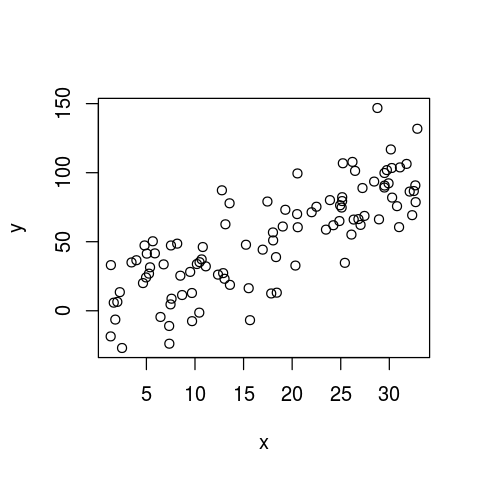

In [5]:
# Basic scatterplot with the built-in graphics library
options(repr.plot.width = 4, repr.plot.height = 4)
plot(y ~ x, df)

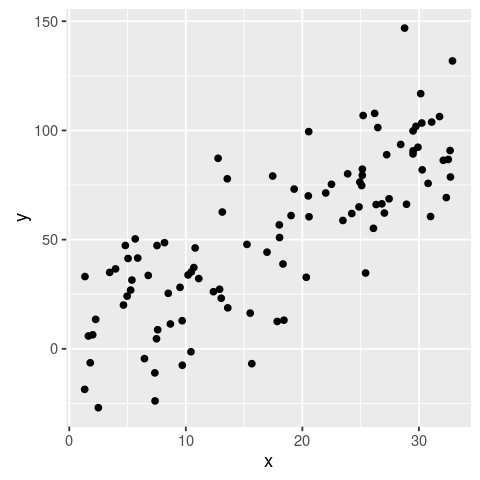

In [6]:
# ggplot equivalent of the above
ggplot(df) + geom_point(aes(x,y))

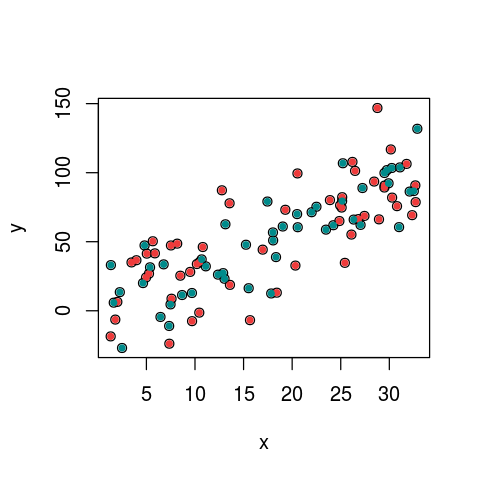

In [7]:
# Now we specify a different color for each group. Built-in graphics:
plot(y ~ x, df)
points(y ~ x, subset(df, a == 1), col='brown2', pch=20)
points(y ~ x, subset(df, a == 2), col='cyan4', pch=20)

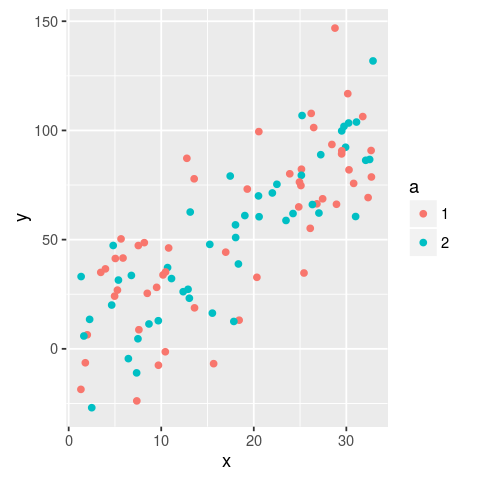

In [8]:
# Equivalent plot in ggplot:
ggplot(df) + geom_point(aes(x,y,color=a))

# Preparing your Data for ggplot

- `ggplot` expects <font color="lightblue">long form data</font>: every row corresponds to a single observation of a variable, along with all covariates
- vs. <font color="lightblue">short form data</font>: a row corresponds to a meaningful collection of observations, i.e. a participant in an experiment
- long-form data is more useful in most contexts in R, because it allows you to condition on any variable; this comes at the expense of redundant values (and hence space)
- use the `melt` and `cast` functions to turn short form data into long-form data using the `reshape` library (by the same author as `ggplot`)

In [9]:
sf = data.frame(country=c('Nigeria','UK'), y2001=c(1,2), y2002=c(2,3), 
y2003=c(3,1))
sf

country,y2001,y2002,y2003
Nigeria,1,2,3
UK,2,3,1


In [10]:
library('reshape')
lf = melt(sf, id = c("country"))
lf

country,variable,value
Nigeria,y2001,1
UK,y2001,2
Nigeria,y2002,2
UK,y2002,3
Nigeria,y2003,3
UK,y2003,1


- Column and row marginals are no longer meaningful 
- Used more than twice as much space
- But once we get past one variable and one grouping....

In [11]:
sf2 = data.frame(country=c('Nigeria','UK'), x2001=c(8,9), x2002=c(7,11), 
x2003=c(6,10), y2001=c(1,2), y2002=c(2,3), y2003=c(3,1))
sf2

country,x2001,x2002,x2003,y2001,y2002,y2003
Nigeria,8,7,6,1,2,3
UK,9,11,10,2,3,1


In [12]:
# A "molten" dataset: variable identity is treated as a variable.
# Every row is an observation of a single variable
m2 = melt(sf2, id = c("country"))
m2$year = as.numeric(gsub('[[:alpha:]]','',m2$variable))
m2$var = as.factor(sapply(m2$variable, function(x){substr(x,1,1)}))
m2$variable = NULL
m2

country,value,year,var
Nigeria,8,2001,x
UK,9,2001,x
Nigeria,7,2002,x
UK,11,2002,x
Nigeria,6,2003,x
UK,10,2003,x
Nigeria,1,2001,y
UK,2,2001,y
Nigeria,2,2002,y
UK,3,2002,y


In [13]:
aggregate(value ~ var + country, m2, mean)

var,country,value
x,Nigeria,7
y,Nigeria,2
x,UK,10
y,UK,2


In [14]:
# From the long-form we can cast any short form we want
lf2 = cast(m2, country+year~var)
lf2

country,year,x,y
Nigeria,2001,8,1
Nigeria,2002,7,2
Nigeria,2003,6,3
UK,2001,9,2
UK,2002,11,3
UK,2003,10,1


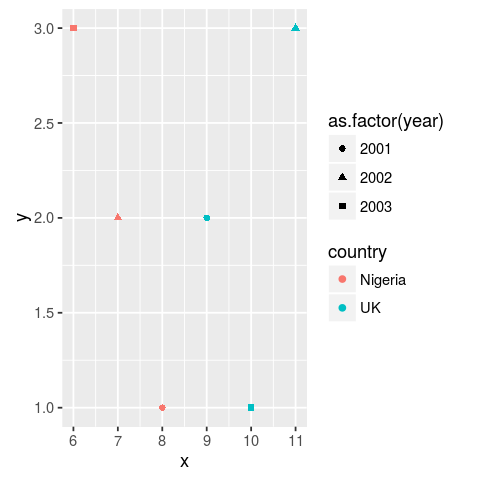

In [15]:
ggplot(lf2) + geom_point(aes(x,y, colour=country, shape=as.factor(year)))

# Primitives in ggplot

1) Briefly mention all of the primitives  
2) Play with each primitive separately  
3) Look at more complex examples  (combinations of the primitives)

- *plot:* collection of layers. Layers inherit properties from the plot if specified
- *geoms*: geometric objects: what objects will be on the plot? (points, bars, histograms, etc.)
- *aesthetics*: visual properties of geoms. The mapping of variables to visual properties of geoms is defined by the `aes()` function.   
- *stats*: a transformation of data (often descriptive statistics)
- *coordinate system*: map from the coordinate system in the data to the 2-d computer screen?
- *facets*: subset the data for disaplying in separate panels
- *axes*: labels, limits on the space defined by the coordinate systems 
- *scales*: further specification of variable-to-aesthetic mappings
- *themes*: "non-data components of the graph": fonts, background colors, etc. 

Primitive: Plot
- Collection of layers, initialized with `ggplot()`
- Generally specifying the data that will be used by all other layers. 
    - But we could also specify an aesthetic mapping with `aes` that would be the default for all layers.
    - We could also specify different data for every layer, but we still need to initialize the plot with `ggplot()`    

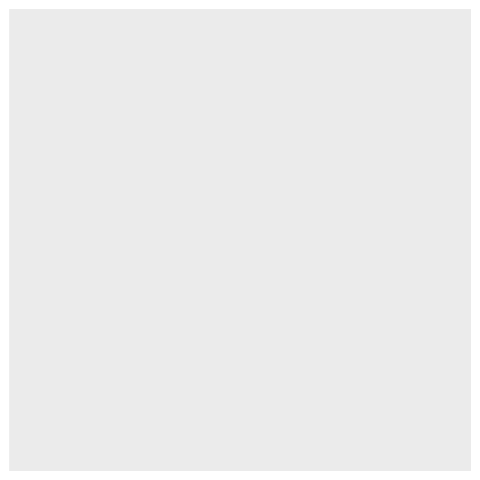

In [16]:
ggplot(df) #blank: collection of layers; in this case empty!

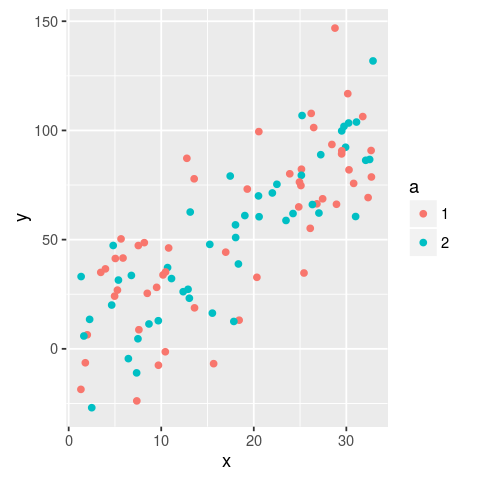

In [17]:
ggplot(df) + geom_point(aes(x,y,color=a))
# aesthetic specified in the geom layer

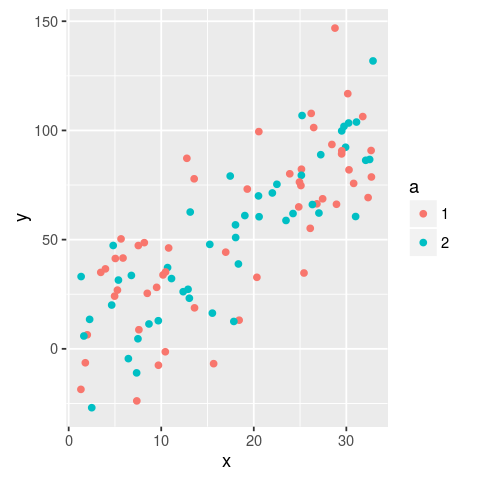

In [18]:
ggplot(df, aes(x,y,color=a)) + geom_point() # equivalent!

### Primitive: Geom
- geometric objects: what objects will be on the plot? (points, bars, histograms, etc.)
    - skip over this for now... more fun when we know about the other primitives. So far we have been using `geom_point()`

### Primitive: Aesthetics

- Aesthetics are the visual properties of geoms. These can reflect variables, but may also be arbitrary.
- The most important function in ggplot is `aes()`: for each geom, it defines how the aesthetics map to variables in your data
- <font color="lightblue">Variable aesthetics</font> and <font color="lightgreen">arbitrary aesthetics</font> are specified with the following syntax
<br />
<br />
<center>ggplot(df) + geom_point(<font color="lightblue">aes(x,y)</font>, <font color="lightgreen">shape=4</font>)</center>

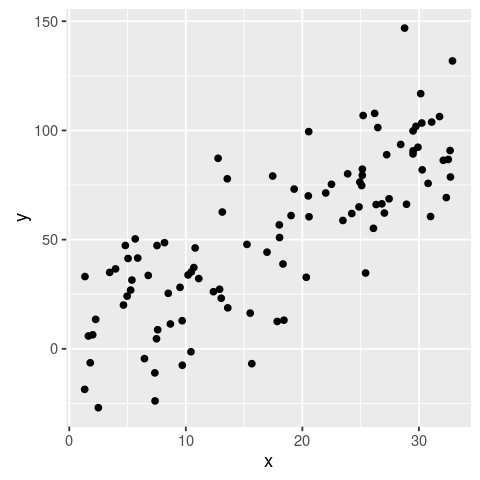

In [19]:
#x and y are obligatory to define the position of the geom
ggplot(df) + geom_point(aes(x,y))

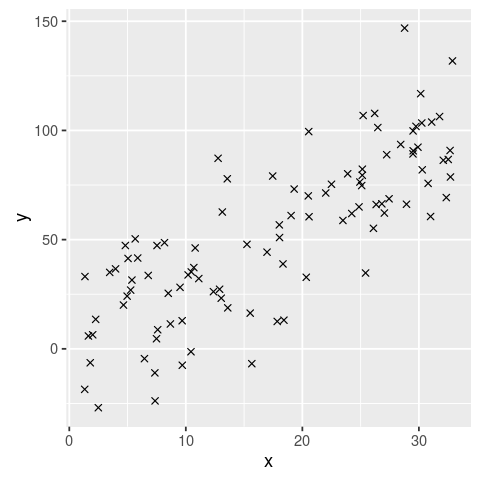

In [20]:
# shape is arbitrary; does not depend on data
ggplot(df) + geom_point(aes(x,y), shape=4) 

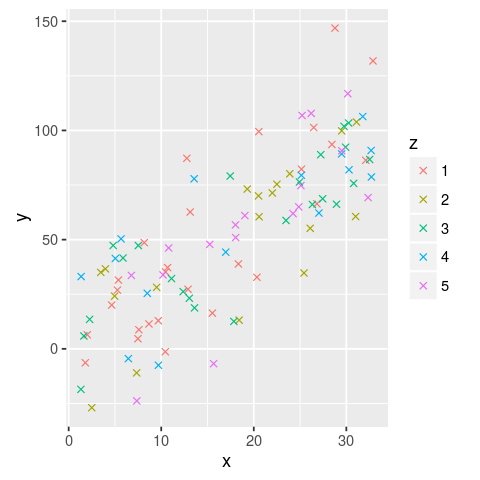

In [21]:
# colour is linked to the data
ggplot(df) + geom_point(aes(x,y,colour=z), shape=4) 

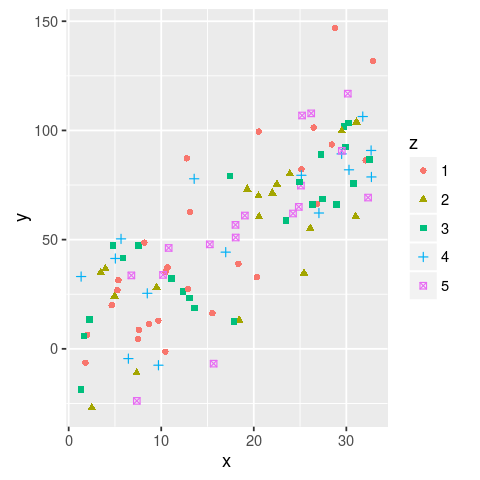

In [22]:
#colour and shape
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)) 

### Primitive: Stats
- a transformation of data (often descriptive statistics)

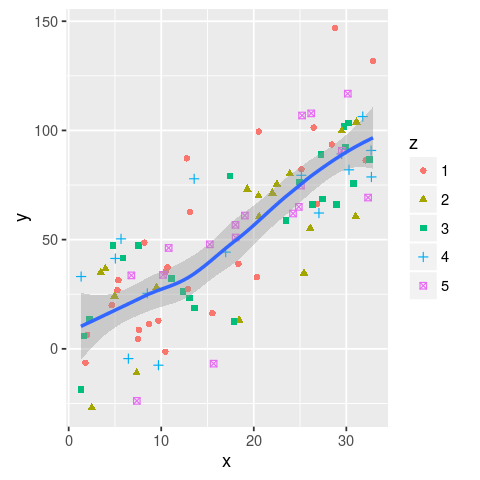

In [23]:
# locally weighted-regression (LOESS smoothing)
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)) + geom_smooth(aes(x,y))

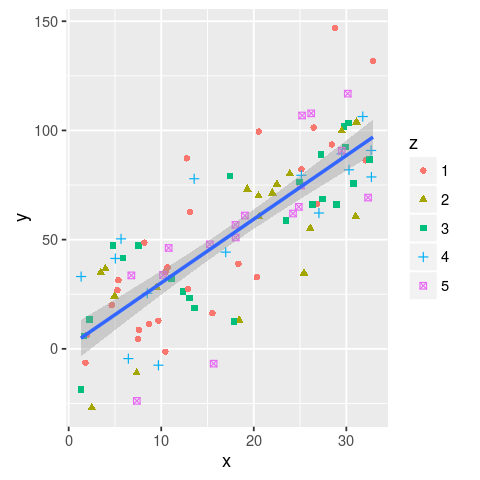

In [24]:
# Linear model
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)) + geom_smooth(aes(x,y), 
    method='glm')

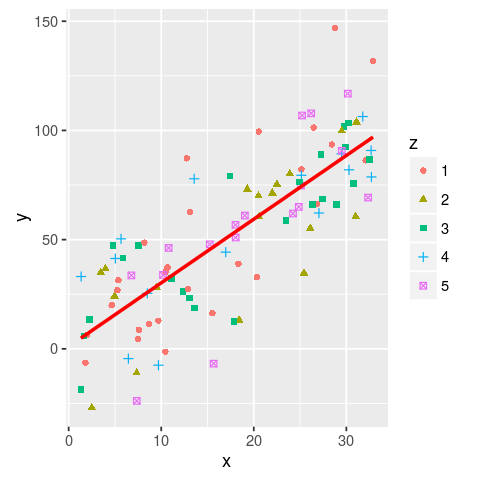

In [25]:
# specifying the color of the linear regression: stats also have aesthetic mappings
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)) + geom_smooth(aes(x,y), 
method='glm', colour='red', se=F)

### Primitive: Coordinate System
- Define the mapping from the coordinate system in the data to the 2-d computer screen?
- Could also specify geographic coordinate system; polar coordinates
- Specify the bounds of the plot

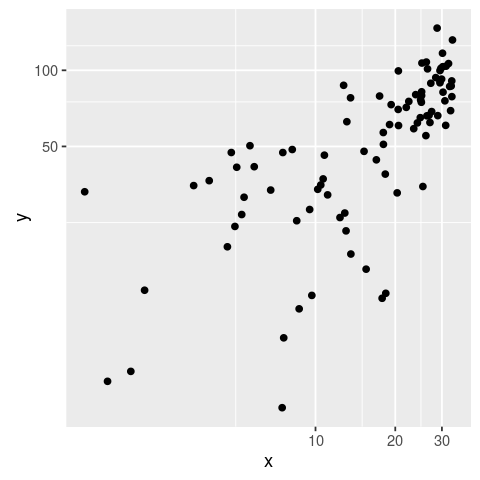

In [26]:
ggplot(subset(df, x > 0 & y > 0) ) + geom_point(aes(x,y)) + coord_trans(
    x = "log2", y = "log2")

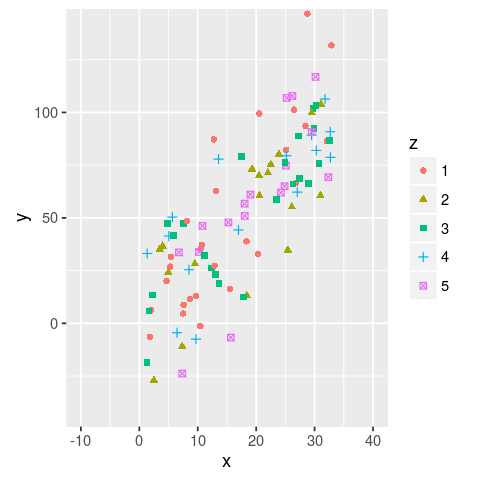

In [27]:
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)
) + coord_cartesian(ylim=c(-40,140), xlim=c(-10,40))

### Primtive: Facets
- subset the data for displaying in separate panels

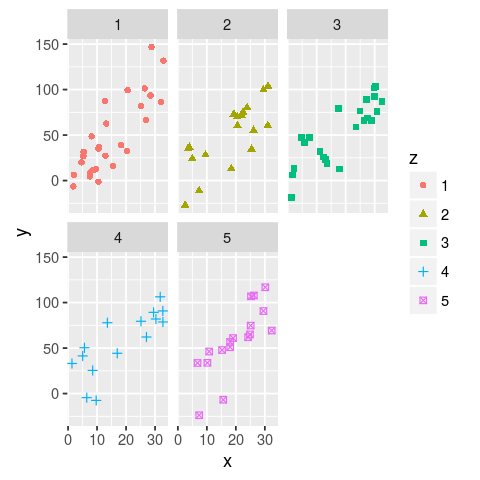

In [28]:
#facet_wrap: consecutive values of a variable
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)) + facet_wrap(~z)

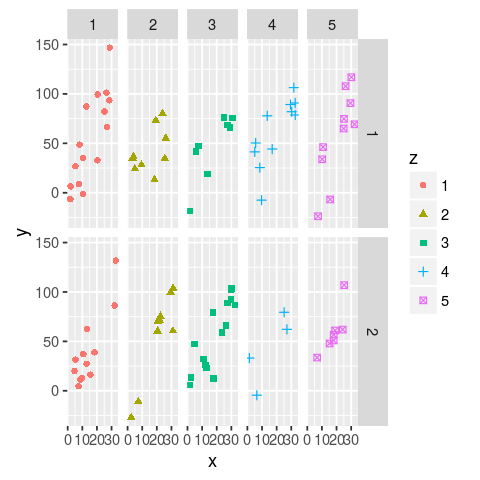

In [29]:
#facet_grid: combinations of two or more variables
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)) + facet_grid(a~z)

### Primtive: Theme
- "non-data components of the graph"
    - fonts
    - background colors
    - axis tick labels
    - grid marks
    - legend
    - etc.


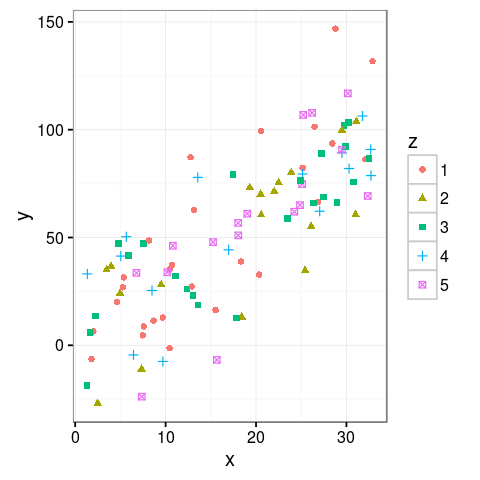

In [30]:
ggplot(df) + geom_point(aes(x,y,colour=z,shape=z)) + theme_bw()

### Recap
- Grammar: plot + layer/specification
- Layers / specifications include geoms, stats, coordinate systems, themes, etc...



# Further Examples

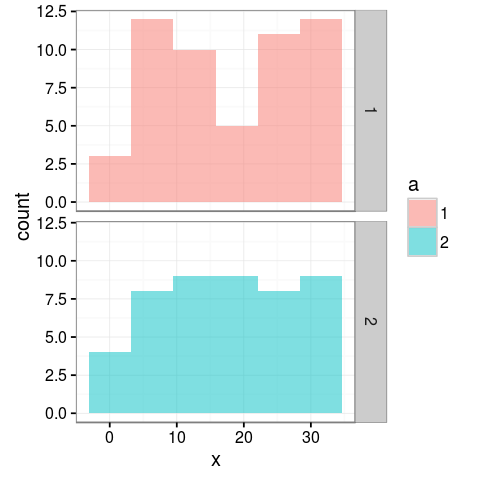

In [31]:
# histogram of x values, grouped by a
ggplot(df) + geom_histogram(aes(x, fill=a), alpha=.5, bins=6
) + facet_grid(a ~ .) + theme_bw()

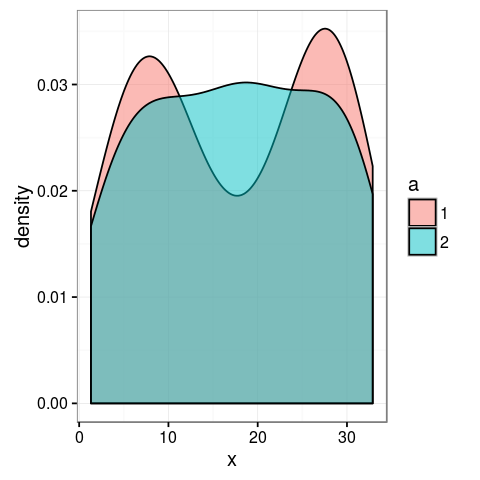

In [32]:
# density plot (smoothed histogram) of x values, grouped by a
ggplot(df) + geom_density(aes(x, fill=a), alpha=.5) + theme_bw()

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


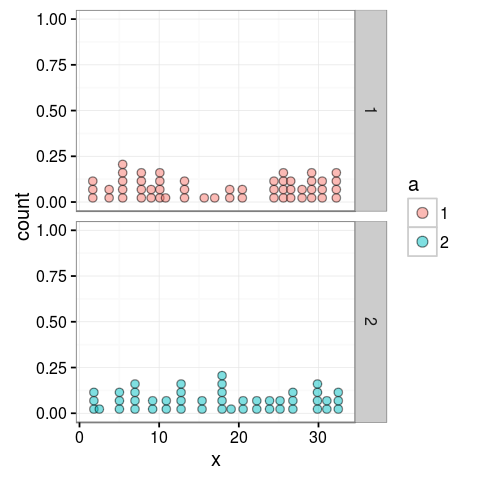

In [33]:
# dotplot of x values (like this histogram)
ggplot(df) + geom_dotplot(aes(x, fill=a), alpha=.5
                         ) + facet_grid(a ~ .) + theme_bw()

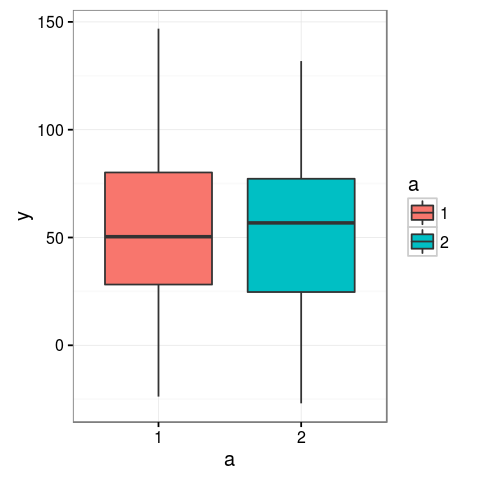

In [34]:
# boxplot of y values, grouped by a
ggplot(df) + geom_boxplot(aes(y=y,x=a, fill=a), ) + theme_bw()

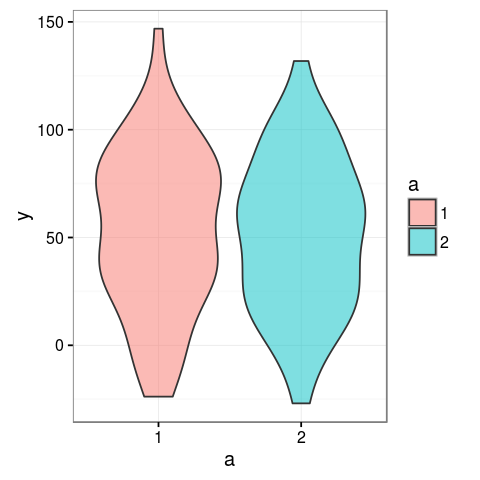

In [35]:
# violin plot (boxplot with relative density) of y values, grouped by a
ggplot(df) + geom_violin(aes(y=y,x=a, fill=a), alpha=.5) + theme_bw()

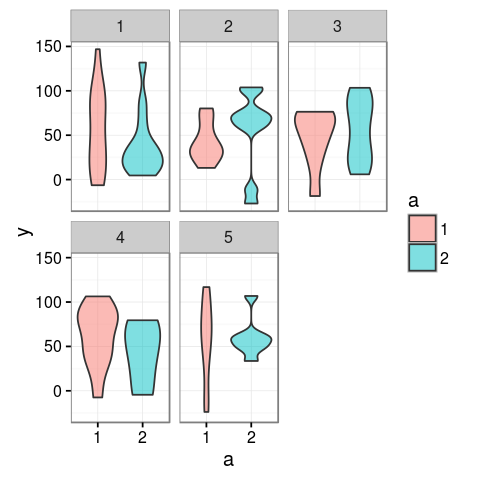

In [36]:
# violin plot of y values, grouped by a, faceted by z
ggplot(df) + geom_violin(aes(y=y,x=a, fill=a), alpha=.5
                        ) + facet_wrap(~z) + theme_bw()

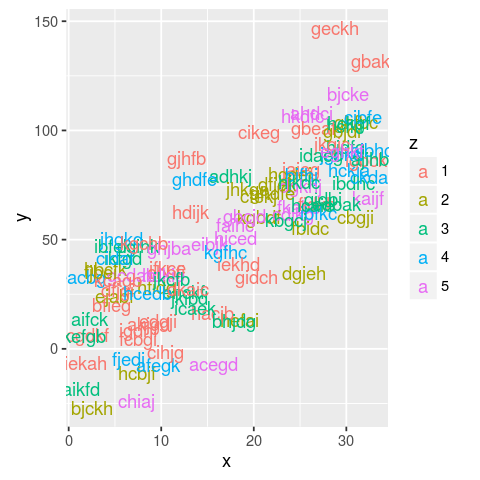

In [37]:
# labeled location of x,y values, colors from z
ggplot(df) + geom_text(aes(x,y,colour=z,label=label))

In [38]:
# barplots are somewhat complicated. Need to compute stats first 
df_means = aggregate(y ~ z + a, df, mean)
df_means

z,a,y
1,1,55.21822
2,1,42.26355
3,1,47.03101
4,1,61.72513
5,1,57.38570
1,2,40.09154
2,2,55.95660
3,2,55.87393
4,2,42.57761
5,2,59.86517


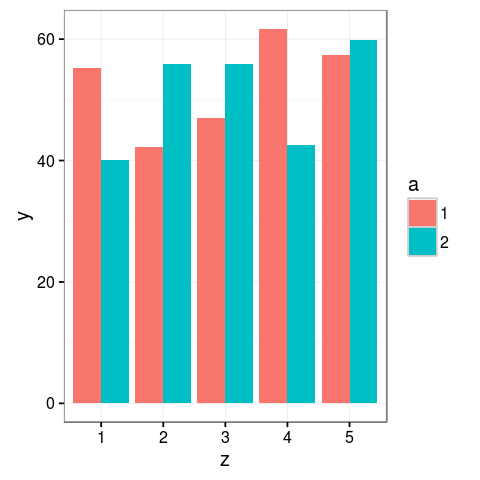

In [39]:
# barplot of the means
ggplot(df_means) + geom_bar(aes(x = z , y=y, fill=a),
position='dodge',stat = "identity") + theme_bw()

In [40]:
# compute standard error of the mean (and other statistics)
sem = function(x) sd(x)/sqrt(length(x))
df_agg <- do.call(data.frame, aggregate(. ~ z + a, df, function(x) 
    c(mean = mean(x), sd = sd(x), sem = sem(x))))
df_agg$y_high = df_agg$y.mean + df_agg$y.sem
df_agg$y_low = df_agg$y.mean - df_agg$y.sem
df_agg

z,a,x.mean,x.sd,x.sem,y.mean,y.sd,y.sem,label.mean,label.sd,label.sem,y_high,y_low
1,1,15.66995,9.938759,2.566176,55.21822,45.59955,11.773754,53.53333,27.98945,7.226846,66.99198,43.44447
2,1,15.00416,9.530182,3.176727,42.26355,22.56687,7.522290,56.11111,19.63698,6.545661,49.78584,34.74126
3,1,17.55293,11.790928,4.168723,47.03101,33.06354,11.689728,53.00000,29.86637,10.559356,58.72074,35.34128
4,1,19.66933,11.722703,3.534528,61.72513,33.92977,10.230211,48.72727,34.07665,10.274497,71.95534,51.49492
5,1,21.21962,9.301391,2.941358,57.38570,46.03968,14.559027,36.30000,29.16257,9.222015,71.94472,42.82667
1,2,14.28568,9.382535,2.708505,40.09154,37.04538,10.694081,53.25000,29.37880,8.480928,50.78562,29.39745
2,2,20.78046,10.040926,3.346975,55.95660,45.30864,15.102879,42.77778,27.41705,9.139016,71.05948,40.85372
3,2,18.66825,10.731596,2.770886,55.87393,35.00264,9.037642,56.53333,34.89958,9.011034,64.91158,46.83629
4,2,14.99400,13.004440,6.502220,42.57761,36.73515,18.367576,41.25000,27.24427,13.622133,60.94518,24.21003
5,2,18.08271,6.132333,2.317804,59.86517,22.85658,8.638976,47.71429,20.14708,7.614880,68.50415,51.22620


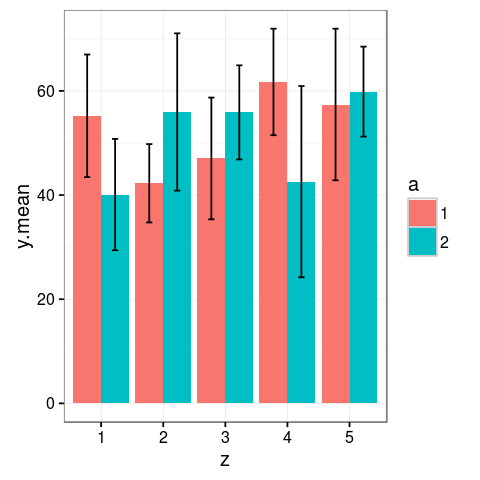

In [41]:
# barplot with error bars
ggplot(df_agg) + geom_bar(aes(x = z , y=y.mean, fill=a),position='dodge',
stat = "identity") + geom_errorbar(aes(x=z, ymax=y_high, ymin=y_low, fill=a),
width=.2, position=position_dodge(.9)) + theme_bw()

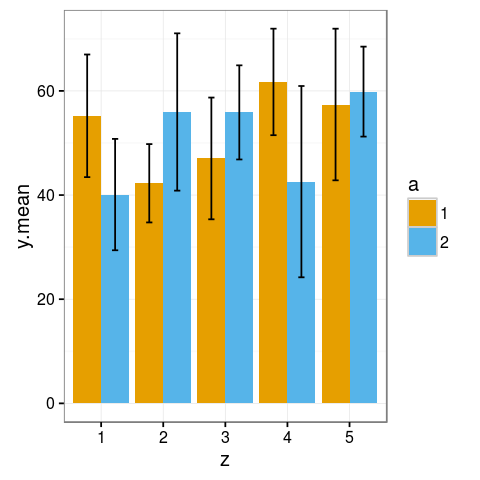

In [42]:
# changing the color of the barplot
ggplot(df_agg) + geom_bar(aes(x = z , y=y.mean, fill=a),position='dodge', 
stat = "identity") + scale_fill_manual(values=c("#E69F00", "#56B4E9")
) + geom_errorbar(aes(x=z, ymax=y_high, ymin=y_low, fill=a), width=.2, 
position=position_dodge(.9)) + theme_bw()

In [43]:
# generate more data
df2 = genData(10000)

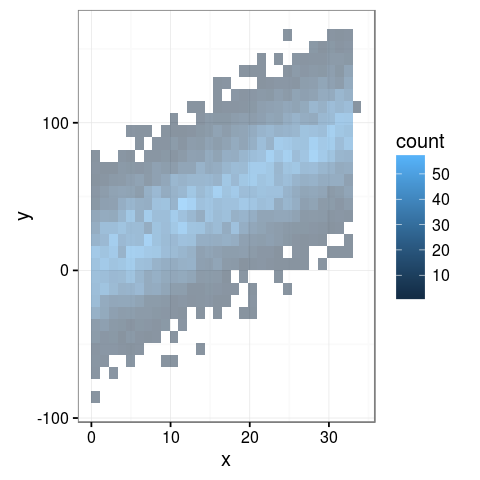

In [44]:
#2d bins: how many points do we have in every bin?
ggplot(df2) + geom_bin2d(aes(y=y,x=x), alpha=.5) + theme_bw()

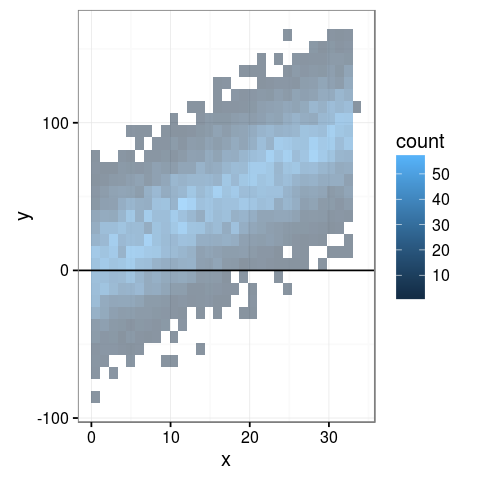

In [45]:
# add a reference line for 0
ggplot(df2) + geom_bin2d(aes(y=y,x=x), alpha=.5) + theme_bw(
) + geom_hline(yintercept=0)

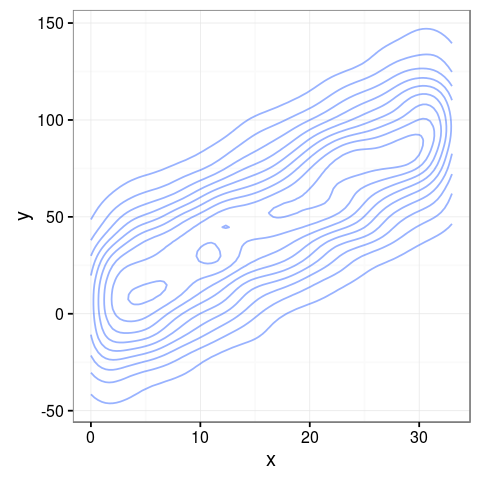

In [46]:
# isomorph plot
ggplot(df2) + geom_density2d(aes(y=y,x=x), alpha=.5) + theme_bw()

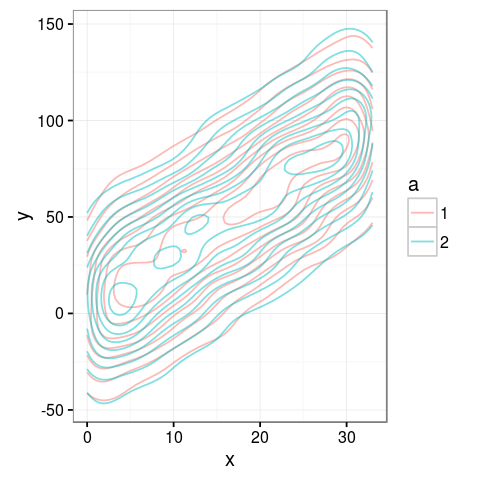

In [47]:
# isomorph plot for two groups
ggplot(df2) + geom_density2d(aes(y=y,x=x, colour=a), alpha=.5) + theme_bw()

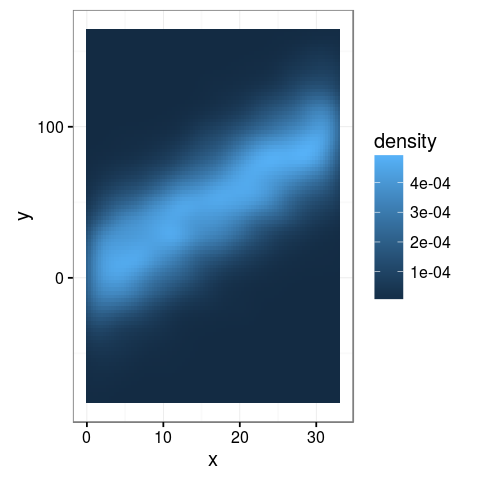

In [48]:
# tiled density plot
ggplot(df2) + stat_density2d(geom="tile", aes(x=x,y=y,fill = ..density..
                                             ), contour = FALSE) + theme_bw()

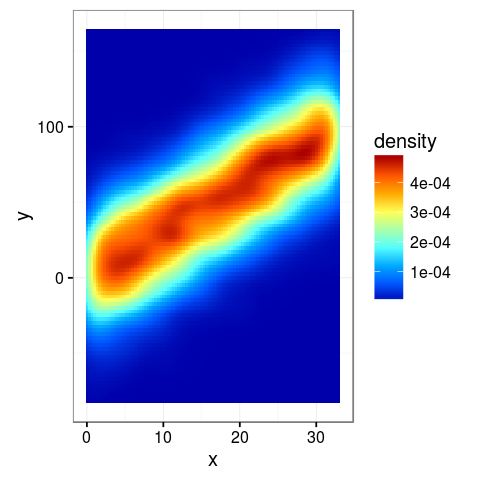

In [49]:
# change the color ramp for the density plot to something a little more exciting
library('colorRamps') # color is its own subject
ggplot(df2) + stat_density2d(geom="tile", aes(x=x,y=y,fill = ..density..
), contour = FALSE)  + scale_fill_gradientn(colours=matlab.like(200)
) + theme_bw()

# Housekeeping
- saving a figure
- plotting multiple figures to the same canvas
- time versioning plots
- retrieving plot attributes
- calling from a Jupyter Notebook with a Python kernel
- final touches in Illustrator
- videos: `ffmpeg`
- where to leave figure interpretations for analyses?

### Saving Figures

Choose between *vector* and *bitmap* representations:  
- *vector*: Save information about shapes. 
    - Good when you have relatively little data
    - Can always zoom in  
- *bitmap*: Record a color (and alpha value) for each (x,y) pair.  
    - this can then be left uncompressed (`.bmp`) or compressed because there is locally redundant information (`.jpg`)  
    - text does not compress well! use `.png` rather than `.jpg` when saving bitmaps    
    
    

In [50]:
# saving a pdf
p1 = ggplot(df2) + stat_density2d(geom="tile", aes(x=x,y=y,
fill = ..density..), contour = FALSE)  + scale_fill_gradientn(colors = 
matlab.like(200)) + theme_bw()
p2 = ggplot(df_agg) + geom_bar(aes(x = z , y=y.mean, fill=a),position = 
'dodge',stat = "identity") + scale_fill_manual(values=c("#E69F00",
"#56B4E9")) + geom_errorbar(aes(x=z, ymax=y_high, ymin=y_low, fill=a), 
width=.2, position=position_dodge(.9)) + theme_bw()

In [51]:
pdf('figures/heatmap.pdf', width=8, height=8)
print(p1)
dev.off()

png 
  2

In [52]:
#saving a png. Note geom='raster' rather than tile for writing to a file
png('figures/heatmap.png', width=1000, height=1000)
print(p2)
dev.off()

png 
  2

### Plotting multiple graphs to the same canvas

In [53]:
#multiplotting
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL){
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

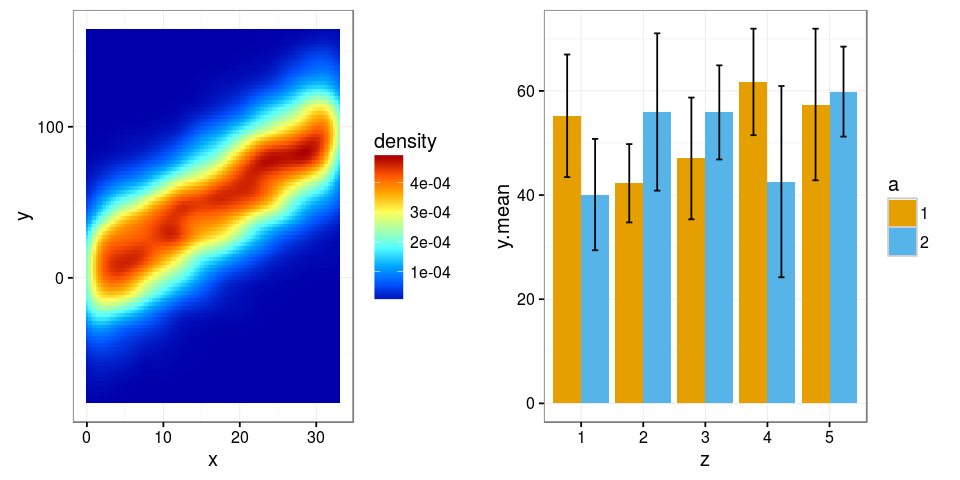

In [54]:
options(repr.plot.width = 8, repr.plot.height = 4)
multiplot(p1, p2, cols=2)

### Time-versioning your figures

In [55]:
#time versioning plots
outputDir = paste0('results/', gsub('[ :]','\\_',Sys.time()), '/')
dir.create(outputDir, showWarnings=F)
print(paste('Created new outputDir:', outputDir))

pdf(paste0(outputDir, 'heatmap.pdf'), width=8, height=8)
print(p1)
dev.off()

png(paste0(outputDir, 'barplot.png'), width=1000, height=1000)
print(p2)
dev.off()

[1] "Created new outputDir: results/2016-10-06_15_45_09/"


png 
  2

png 
  2

### Retrieving information from plots

Say you want to make a new plot `p2` with the same (auto-generated) x-axis range as `p1`. You can retrieve a panel ranges through by building the graph and querying the resuling object in R 

In [56]:
#getting a range from a plot to use in another plot
ggplot_build(p1)$panel$ranges[[1]]$y.range

[1] -95.51651 177.36252

### Calling ggplot from Jupyter Notebook with a Python kernel 

Thanks to Richard Futrell (MIT) for this trick. This means that all of you who want to do data analysis in Python (e.g. `pandas`) can use ggplot with ease. Also works for passing data to R to do linear modeling!

`import rpy2.robjects.lib.ggplot2 as ggplot2`  
`%load_ext rpy2.ipython`  

`%R -i df,var2,var3`  

(new cell)  
`%%R`  
`ggplot(df) + ...`  

(same cell)  
`%R ggplot(df) + ...`  

### Editing figures in Illustrator/Photoshop
- Can edit vector graphics (PDFs) in Illustrator and bitmaps in Photoshop.  Demo.

### Videos
- Can composit a series of bitmap images into a video:
- `ffmpeg -r 20 -pattern_type glob -i '*.png' output.mp4`

### Interpreting Graphs
- Consider keeping plots and written interpretations together with a notebook!

# Other visualization resources:
- RGL: 3d plots in OpenGL 
    - http://statisticsr.blogspot.com/2008/10/some-r-functions.html
- Plotly: all sorts of plots in Javascript
    - http://moderndata.plot.ly/interactive-r-visualizations-with-d3-ggplot2-rstudio/
- Viewpoints: High dimensional continuous data
    - https://github.com/jblomo/viewpoints
- Shiny: interactive plots
    - http://shiny.rstudio.com/gallery/
- networkD3: D3 network graphs 
    - http://www.htmlwidgets.org/showcase_networkD3.html

# Summary
- Get your data `df` in longform, then:   
<br />

<center>`ggplot(df) + geom(aes(x,y, color=z))`</center>  


# Errors

The best thing about graphing in R is the errors:

<img src="images/ageA_ageB.png" alt="ageA_ageB" style="width: 600px"/>

<img src="images/sublex_barplot.png" alt="sublex_barplot" style="width: 800px"/>

<img src="images/one_age_towers.png" alt="one_age_towers" style="width: 600px"/>

<img src="images/lessThan1Yellow.png" alt="lessThan1Yellow" style="width: 600px"/>

<img src="images/snowflakes.png" alt="snowflakes" style="width: 600px"/>

<img src="images/gaussians.png" alt="gaussians" style="width: 600px"/>

<img src="images/blobs.png" alt="blobs" style="width: 600px"/>

<img src="images/skewered.png" alt="skewered" style="width: 800px"/>

But it's not like any crazy graphs make it into the literature...

<table>
<tr>
<td>
<img src="images/rigid_object.png" alt="rigid_object" style="width: 250px"/>
</td>
<td>
<img src="images/phonRepresentationOfthePastTense.png" alt="phonological representation of the past tense" style="width: 400px"/>
</td>
</tr>
<tr>
<td>
<img src="images/lupyan.png" alt="lupyan" style="width: 400px"/>
</td>
</tr>
</table>

# ggplot Resources
Official documentation (fantastic!)  
http://docs.ggplot2.org/current/ 

Quick-reference guide from R-Studio:  
https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf  

Hadley's Talk on GGplot:  
http://www.slideshare.net/RevolutionAnalytics/a-backstage-tour-of-ggplot2-with-hadley-wickham  

Recent developments with interactive graphics: 
https://www.r-bloggers.com/ggplot2-docs-completely-remade-in-d3-js/  
http://www.htmlwidgets.org/showcase_leaflet.html

# Practice
Can you re-create these plots?

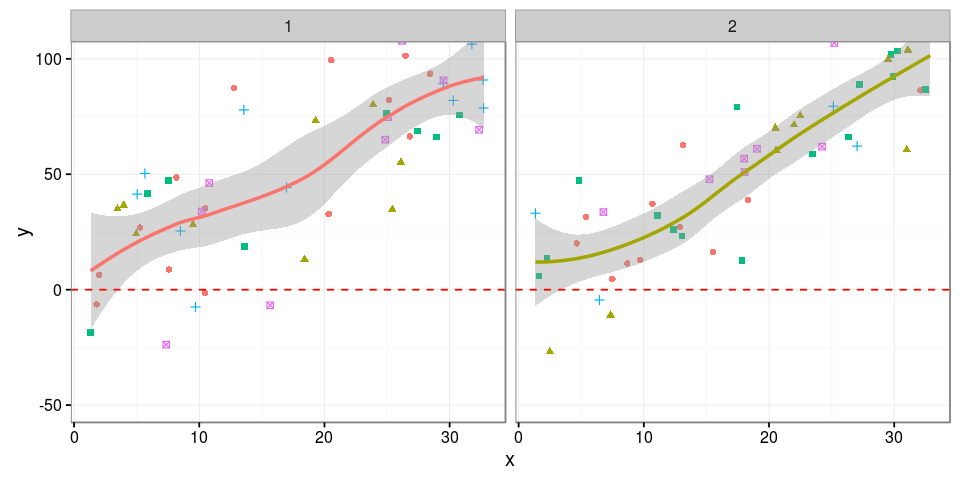

In [57]:
source('testPlot1.R')

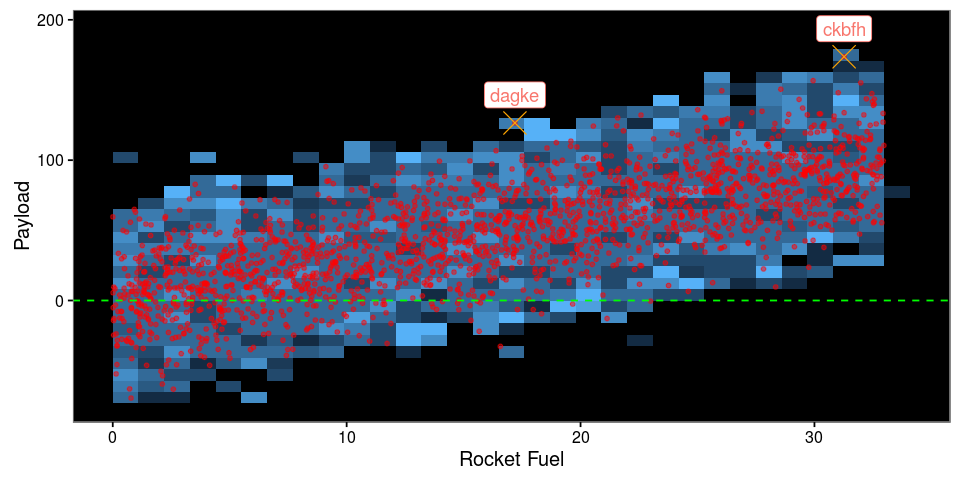

In [58]:
source('testPlot2.R')

- Each square is colored according to its median `z` value
- Each point belonging to group 3 is displayed in red
- 4 points that are outliers are labeled at the top (this will require some data manipulation!)